In [28]:
import drops, utilities, wave_reflection, vertical, constants
import pleasy
from scipy.optimize import fsolve
%matplotlib notebook

In [2]:
t = linspace(0, 10, 1000)

soln, impacts = drops.ode_standalone(t, corral=False)

x = soln[:, 0, 0]
y = soln[:, 0, 1]
z = soln[:, 0, 2]


c:\users\david\appdata\local\programs\python\python36\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


<IPython.core.display.Javascript object>


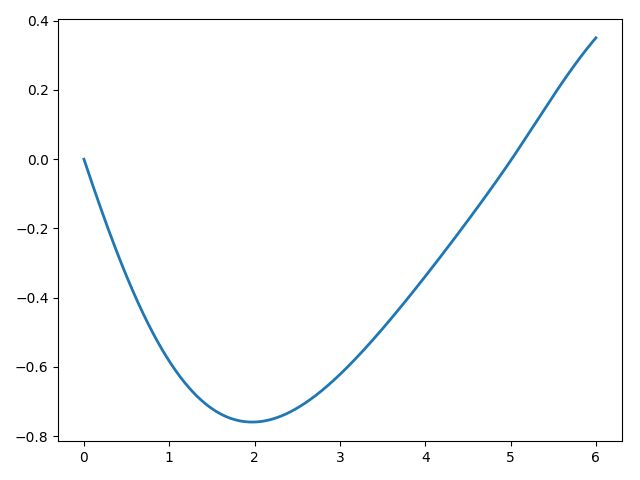

<IPython.core.display.Javascript object>


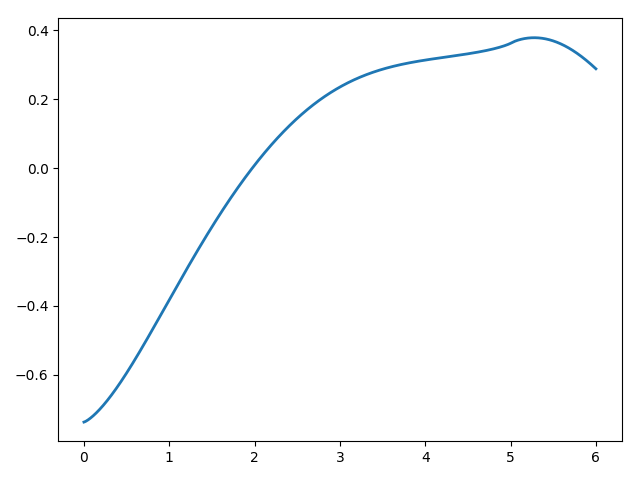

(5.012301230123013, 2.8331182755466547e-06, 0.3643928579916205)


In [92]:
# Demonstrate the logarithmic spring model of the drop's vertical motion during contact with the bath.
# t = linspace(0, 10, 1000)
# τ_ = t * drops.ω_D

τ_ = linspace(0, 6, 1e4)

soln2 = vertical.log_spring(τ_, .2)
Z, v = soln2[:, 0], soln2[:, 1]

pleasy.plot(τ_, Z)
pleasy.plot(τ_, v)

exit = vertical.find_exit_conditions(τ_, soln2)
print(exit)

<IPython.core.display.Javascript object>


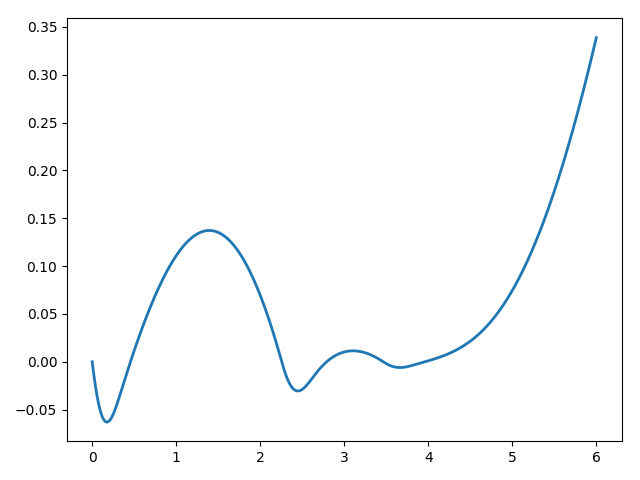

In [17]:
soln3 = vertical.lin_spring(τ_)
pleasy.plot(τ_, soln3[:,0])

<IPython.core.display.Javascript object>


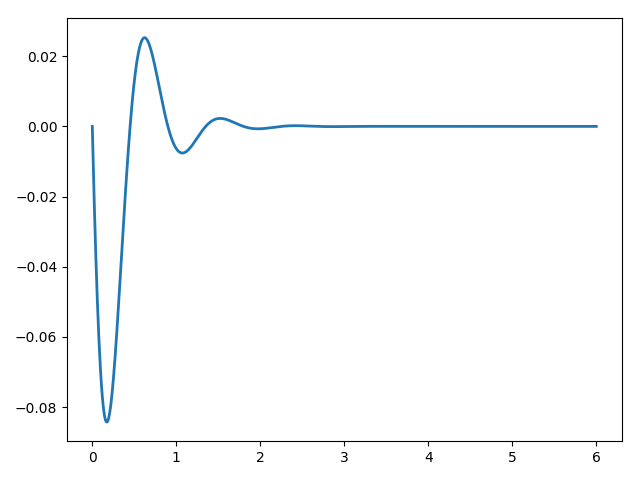

In [47]:
soln4 = vertical.lin_spring_analytic(τ_)

pleasy.plot(τ_, soln4)

(-114, 114) (-114, 114)


<IPython.core.display.Javascript object>


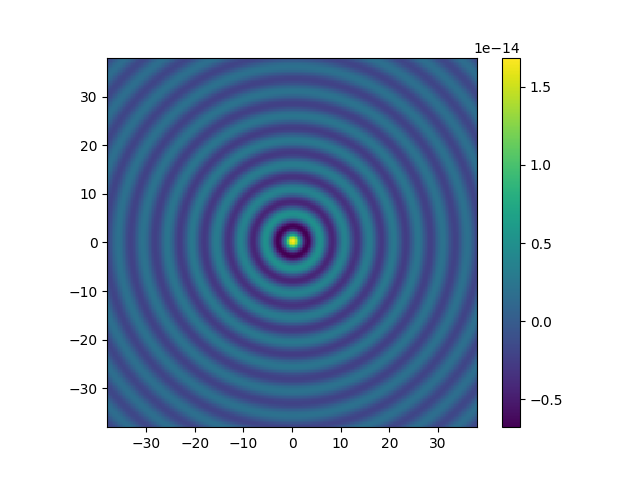

<IPython.core.display.Javascript object>


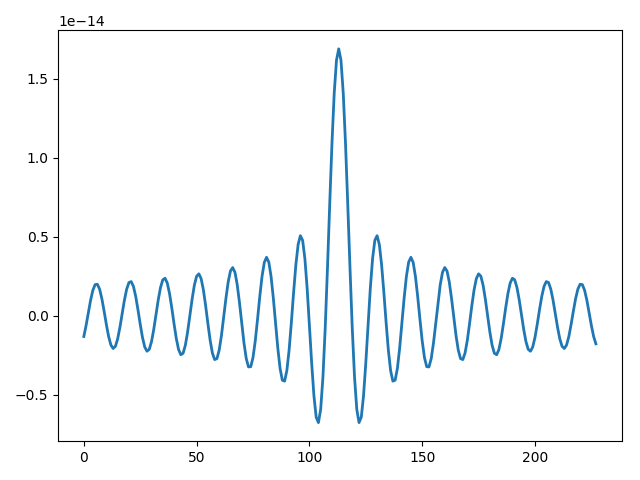

In [20]:
imp = drops.Impact(0., 0., 0., 5.)

# utilities.wave_field(.1, [imp], resolution=3, corral=False)


a = utilities.wave_field(.1, [imp], resolution=3, plot=True, corral=False)


pleasy.plot(a[:, int(a.shape[1]/2)])

In [11]:
soln = drops.vertical(1, 2, 3)
pleasy.plot(soln[:, 0])

AttributeError: module 'drops' has no attribute 'vertical'